In [2]:
import tweepy as tw
import pandas as pd
import json
import time
import numpy as np
from nltk import pos_tag
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer

In [5]:
# App Auth
consumer_key = 'qZfLrIhQwjmNWG4hsFs2JDJu7'
consumer_secret = 'bBrqCs66Z5K7S50v5ClUaITnGH1w51C2bNPKAwAth0BVKGi7tZ'
access_key = '1171440028465192960-4tOrGynhkeOxmEGNUFdPu8OKEyrMHB'
access_secret = '4k8wXvXbGj6AYrNlqUBykJ9PR5awz3AVhbAYFEoQI5i8i'

# Initialize API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Search terms
search_words = ["#onlinelearning"]
new_search = search_words + " -filter:retweets"
#search_words = ["#onlineschool"]
#search_words = ["#onlineclass"]
#search_words = ["#onlineclasses"]
#search_words = ["#onlineeducation"]
#date_since = "2020-01-01"
#data_size = 100000
# Collect tweets
'''tweets = tw.Cursor(api.search,
              q=new_search,
              lang="en",
              tweet_mode="extended",
              include_rts=True).items(40000)'''
tweets = tw.Cursor(api.search,
              q=new_search,
              lang="en",
              tweet_mode="extended").items(40000)

tweets_arr = []
'''with open("online_education_tweets.txt","a") as output:
    for tweet in tweets:
        tweets_arr.append(tweet.text)'''
        
#print(tweets)
# Iterate and print tweets
while True:
    try:
        tweet = tweets.next()
        print("Tweet")
        #print(tweet.text)
        print(tweet.full_text)
        print("\n")
        tweets_arr.append(tweet._json)
        with open("tweets.txt", "a") as output:
            for i in range(0,len(tweets_arr)):
                if 'retweeted_status' in tweets_arr[i]:
                    output.write(json.dumps(tweets_arr[i]['retweeted_status']['full_text'],indent=1))
                else:
                    output.write(json.dumps(tweets_arr[i]['full_text'],indent=1))
                output.write("\n")
    except tw.TweepError:
        print("Sleeping for 15 minutes....")
        time.sleep(60*15)
        continue
    except StopIteration:
        break
    

Tweet
The enforced experiment of mass lockdowns has de-stigmatised #onlineshopping, #onlinelearning and #remoteworking, by demonstrating that with the right equipment and support, they really can work at scale. https://t.co/8bG20kZx0Q #MSFTAdvocate


Tweet
Are you looking to learn new skills for free? Check out our online course on how to use https://t.co/ts5RshcZM6: https://t.co/ZBUyL82a9R
@nypl @lynda #onlinelearning #digitalresources #libraries #libraryresources #computerliteracy https://t.co/PFGOfwRC1B


Tweet
We're accepting final applications for our FREE Certificate in Admin &amp; Digital Skills course. Limited spaces available, learn more here ⬇️ @hea_irl #onlinelearning
https://t.co/KeMHIolDjf https://t.co/5TyPnjSD5P


Tweet
What is education? ... The 5 big mistakes in virtual education https://t.co/cRZ28OFbP6 #elearning #mlearning #onlinelearning #virtualeducation #education #educación #edtech #educaciónadistancia #edchat #EDreform #pedagogy #pedagogía #pedagogie #escuela #Hi

KeyboardInterrupt: 

In [4]:
#removing duplicates in the text file
lines_seen = set()
outfile = open('education_tweets.txt','w')
infile = open('tweets.txt','r')
for line in infile:
    if line not in lines_seen:  # not a duplicate
        outfile.write(line)
        lines_seen.add(line)
outfile.close()

In [5]:
with open('education_tweets.txt') as f:
    education_tweets = []
    for line in f:
        education_tweets.append(line)


In [6]:
def lemmatize_words(word,pos):
    if pos.startswith('J'):
        return lemmatizer.lemmatize(word,"a")
    elif pos.startswith('V'):
        return lemmatizer.lemmatize(word,"v")
    elif pos.startswith('N'):
        return lemmatizer.lemmatize(word,"n")
    elif pos.startswith('R'):
        return lemmatizer.lemmatize(word,"r")
    else:
        return lemmatizer.lemmatize(word)

In [7]:
filtered_tokens = []
filtered_tweets = []
stop_words = set(stopwords.words('english'))
eng_words = set(words.words())
lemmatizer = WordNetLemmatizer()
for tweet in education_tweets:
    tokenized_tweet = word_tokenize(tweet)
    #print(pos_tag(tokenized_tweet))
    #print(pos_tag(tokenized_tweet)[0][1])
    #break
    filtered_tokens = []
    for i in range(0, len(tokenized_tweet)):
        tokenized_tweet[i] = tokenized_tweet[i].lower()
        if tokenized_tweet[i] not in stop_words and len(tokenized_tweet[i]) >= 2 and tokenized_tweet[i].isalpha():
            filtered_tokens.append(lemmatize_words(tokenized_tweet[i], pos_tag(tokenized_tweet)[i][1]))
            
    filtered_tweets.append(TreebankWordDetokenizer().detokenize(filtered_tokens))
    '''for t in tokenized_tweet:
        t = t.lower()
        if t not in stop_words and len(t) >= 2 and t.isalpha() and t in eng_words:
             filtered_tokens.append(lemmatizer.lemmatize(t))
    #print(filtered_tokens)
    filtered_tweets.append(TreebankWordDetokenizer().detokenize(filtered_tokens))
    #print(filtered_tweets)'''
            
print(filtered_tweets[:10])
#print(lemmatizer.lemmatize("makes"))
#token = word_tokenize(tweet_docs[0])
#print(token)'''

['ready black friday shopping forget pick stock idea http teachersofinstagram onlinelearning onlinelearningessentials resourcesforonlinelearning http', 'people real wealth meet remote lab team teamacrome robotics control mechatronics techstartup machinelearning internetofthings robot roboticslab algorithms onlinelearning controlengineering automation experiment engineeringlab http', 'courserious review new strategy start selling course online http via youtube onlinelearning onlinebusiness marketing marketingdigital digitalmarketing makemoneyonline review', 'yes english weird understand tough thorough thought language onlinelearning', 'great webinar zoom interactive onlinelearning slt palliativecare nurse http', 'final mediation training take place december miss opportunity become accredited mediator mediation wedmediateonline international learn onlinelearning learnfromhome http', 'join u create readiness amp difficult behaviour focus effective strategy support autism onlinelearning co

In [8]:
print(education_tweets[0])
print(filtered_tweets[0])

"Ready for Black Friday shopping? \ud83d\udecd\ufe0f Don't forget to pick up some\u270f\ufe0f for stocking stuffers\ud83c\udf84Need ideas? https://t.co/GjrGyHi6PF #teachersofinstagram #onlinelearning #onlinelearningessentials #resourcesforonlinelearning #giftideasforteachers2020\n#giftideasforstudents2020 https://t.co/kZ1la6DkKd"

ready black friday shopping forget pick stock idea http teachersofinstagram onlinelearning onlinelearningessentials resourcesforonlinelearning http


In [9]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [10]:
def calculate_sentiment(Clean_text):
    return TextBlob(Clean_text).sentiment

In [11]:
def calculate_sentiment_analyser(Clean_text):    
    return analyser.polarity_scores(Clean_text)

In [62]:
d = {'full_tweet': education_tweets, 'clean_tweet': filtered_tweets}
df = pd.DataFrame(data=d)
df

,full_tweet,clean_tweet
0,"""Ready for Black Friday shopping? \ud83d\udecd...",ready black friday shopping forget pick stock ...
1,"""Our people is our real wealth. Meet our Remot...",people real wealth meet remote lab team teamac...
2,"""courserious review: New Strategy to start sel...",courserious review new strategy start selling ...
3,"""Yes, English can be weird. \n\nIt can be unde...",yes english weird understand tough thorough th...
4,"""Great webinar! #zoom #interactive #onlinelear...",great webinar zoom interactive onlinelearning ...
...,...,...
5153,"""Very interesting #interview #podcast by @reck...",interesting interview podcast reckless sophier...
5154,"""\u201cWhen you open a buy now, pay later acco...",open buy pay later account saidyou approve sou...
5155,"""The National Institute for Genealogical Studi...",national institute genealogical study offer dn...
5156,"""SUU\u2019s Master of Interdisciplinary Studie...",master interdisciplinary study mi program offe...


In [64]:
#tokenizing filtered/pre-processed tweets
df['clean_token'] = [[tweet for tweet in document.split()] for document in df['clean_tweet']]
df['sentiment']=df.clean_tweet.apply(calculate_sentiment)
df['sentiment_analyser']=df.clean_tweet.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(df)),columns= ['clean_token','compound_score','compound_score_sentiment'])

for i in range(0,len(df)): 
    s['compound_score'][i] = df['sentiment_analyser'][i]['compound']
  
    if (df['sentiment_analyser'][i]['compound'] <= -0.05):
        s['compound_score_sentiment'][i] = 'Negative'    
    if (df['sentiment_analyser'][i]['compound'] >= 0.05):
        s['compound_score_sentiment'][i] = 'Positive'
    if ((df['sentiment_analyser'][i]['compound'] >= -0.05) & (df['sentiment_analyser'][i]['compound'] <= 0.05)):
        s['compound_score_sentiment'][i] = 'Neutral'


df['compound_score'] = s['compound_score']
df['compound_score_sentiment'] = s['compound_score_sentiment']
df.head(50)

,full_tweet,clean_tweet,clean_token,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,"""Ready for Black Friday shopping? \ud83d\udecd...",ready black friday shopping forget pick stock ...,"[ready, black, friday, shopping, forget, pick,...","(0.016666666666666677, 0.4666666666666667)","{'neg': 0.116, 'neu': 0.732, 'pos': 0.152, 'co...",0.1531,Positive
1,"""Our people is our real wealth. Meet our Remot...",people real wealth meet remote lab team teamac...,"[people, real, wealth, meet, remote, lab, team...","(0.05, 0.25)","{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.4939,Positive
2,"""courserious review: New Strategy to start sel...",courserious review new strategy start selling ...,"[courserious, review, new, strategy, start, se...","(0.13636363636363635, 0.45454545454545453)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,Neutral
3,"""Yes, English can be weird. \n\nIt can be unde...",yes english weird understand tough thorough th...,"[yes, english, weird, understand, tough, thoro...","(-0.2962962962962963, 0.6111111111111112)","{'neg': 0.269, 'neu': 0.504, 'pos': 0.227, 'co...",0.128,Positive
4,"""Great webinar! #zoom #interactive #onlinelear...",great webinar zoom interactive onlinelearning ...,"[great, webinar, zoom, interactive, onlinelear...","(0.8, 0.75)","{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.6249,Positive
5,"""The final Civil/Commercial Mediation Training...",final mediation training take place december m...,"[final, mediation, training, take, place, dece...","(0.0, 0.5)","{'neg': 0.078, 'neu': 0.784, 'pos': 0.137, 'co...",0.296,Positive
6,"""Join us on 4/12 for \u2018Autism: creating re...",join u create readiness amp difficult behaviou...,"[join, u, create, readiness, amp, difficult, b...","(0.04999999999999999, 0.9)","{'neg': 0.102, 'neu': 0.407, 'pos': 0.492, 'co...",0.8225,Positive
7,"""Kids always find a way to have fun! \ud83d\ud...",kid always find way fun jbeatschoolofmusic mus...,"[kid, always, find, way, fun, jbeatschoolofmus...","(0.3, 0.2)","{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.5106,Positive
8,"""Are you looking to engage kids in an online s...",look engage kid online setting new improved ha...,"[look, engage, kid, online, setting, new, impr...","(0.06818181818181818, 0.2897727272727273)","{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",0.6705,Positive
9,"""New- Teachers Are Now Able to Create Interact...",teacher able create interactive lesson quizizz...,"[teacher, able, create, interactive, lesson, q...","(0.5, 0.625)","{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.2732,Positive


In [14]:
df.compound_score_sentiment.value_counts()

Positive    3295
Neutral     1450
Negative     413
Name: compound_score_sentiment, dtype: int64

Text(0, 0.5, 'tweets')

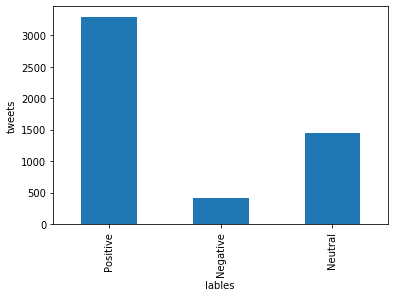

In [65]:
#plot the sentiment polarity 
import matplotlib.pyplot as plt
ax = df['compound_score_sentiment'].value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('lables ')
ax.set_ylabel('tweets')

In [59]:
for i in range(0,len(df)):
    if df['compound_score_sentiment'][i] == 'Positive':
        df['compound_score_sentiment'][i] = 2
    elif df['compound_score_sentiment'][i] == 'Neutral':
        df['compound_score_sentiment'][i] = 1
    elif df['compound_score_sentiment'][i] == 'Negative':
        df['compound_score_sentiment'][i] = 0
df['compound_score_sentiment']

0       2
1       2
2       1
3       2
4       2
       ..
5153    2
5154    2
5155    2
5156    2
5157    2
Name: compound_score_sentiment, Length: 5158, dtype: object

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [18]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['clean_tweet'],df['compound_score_sentiment'],test_size=0.3)

In [19]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [20]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['clean_tweet'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [21]:
print(Train_X_Tfidf)

  (0, 4398)	0.21516810738851908
  (0, 3901)	0.1646237683184839
  (0, 3270)	0.4109237039695056
  (0, 3110)	0.060895384714325596
  (0, 2768)	0.2076716547524915
  (0, 2549)	0.20742416983340475
  (0, 2454)	0.1197577501500774
  (0, 2257)	0.3969335286891519
  (0, 2010)	0.11925253958529333
  (0, 1935)	0.19227534043428757
  (0, 1846)	0.2741056230663386
  (0, 1587)	0.3860819056840734
  (0, 1313)	0.20817043534691312
  (0, 1292)	0.26010601966907393
  (0, 1102)	0.19430575866948555
  (0, 901)	0.210744087803924
  (0, 151)	0.16565850270860596
  (1, 4482)	0.2924607170628766
  (1, 4436)	0.3629513541385593
  (1, 4247)	0.2850490240683064
  (1, 3110)	0.08034539765701852
  (1, 3081)	0.15410276020497637
  (1, 2879)	0.46492199767431
  (1, 1795)	0.2924607170628766
  (1, 1578)	0.45880657791840157
  :	:
  (3608, 3110)	0.045684275720150117
  (3608, 2465)	0.1299547776380683
  (3608, 2454)	0.08984336174485036
  (3608, 2446)	0.2166218228317979
  (3608, 2337)	0.24093709577498282
  (3608, 2011)	0.15951718379639923
  

In [22]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Naive Bayes Precision Score -> ",precision_score(predictions_NB, Test_Y, average="weighted")*100)
print("Naive Bayes Recall Score -> ",recall_score(predictions_NB, Test_Y, average="weighted")*100)
print("Naive Bayes F1 Score -> ",f1_score(predictions_NB, Test_Y, average="weighted")*100)
#print("Naive Bayes ROC AUC Score: -> ",roc_auc_score(predictions_NB, Test_Y, multi_class='ovr')*100)
#print('Confusion Matrix: ',confusion_matrix(Test_Y,predictions_NB), sep = '\n')


Naive Bayes Accuracy Score ->  69.44444444444444
Naive Bayes Precision Score ->  93.24081483658992
Naive Bayes Recall Score ->  69.44444444444444
Naive Bayes F1 Score ->  76.84887780137656


Naive Bayes Confusion matrix, without normalization
[[ 12   4 112]
 [  0  95 350]
 [  1   6 968]]
Naive Bayes Normalized confusion matrix
[[0.09375    0.03125    0.875     ]
 [0.         0.21348315 0.78651685]
 [0.00102564 0.00615385 0.99282051]]


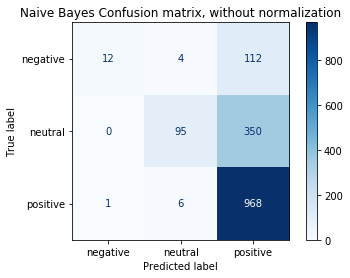

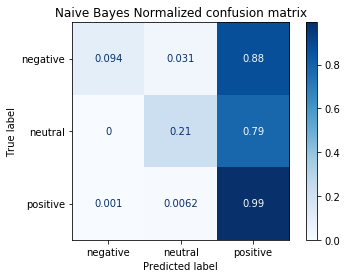

In [23]:
# Plot non-normalized confusion matrix
titles_options = [("Naive Bayes Confusion matrix, without normalization", None),
                  ("Naive Bayes Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(Naive, Test_X_Tfidf, Test_Y,
                                 display_labels=["negative","neutral","positive"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [24]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(predictions_SVM, Test_Y, average="weighted")*100)
print("SVM Recall Score -> ",recall_score(predictions_SVM, Test_Y, average="weighted")*100)
print("SVM F1 Score -> ",f1_score(predictions_SVM, Test_Y, average="weighted")*100)
#print('SVM ROC AUC Score: ',roc_auc_score(predictions_SVM, Test_Y)*100)
#print('Confusion Matrix: ',confusion_matrix(Test_Y,predictions_SVM), sep = '\n')

SVM Accuracy Score ->  79.58656330749353
SVM Precision Score ->  85.34098944688996
SVM Recall Score ->  79.58656330749353
SVM F1 Score ->  81.47219045991348


SVM Confusion matrix, without normalization
[[ 30  22  76]
 [  2 287 156]
 [  2  58 915]]
SVM Normalized confusion matrix
[[0.234375   0.171875   0.59375   ]
 [0.00449438 0.64494382 0.3505618 ]
 [0.00205128 0.05948718 0.93846154]]


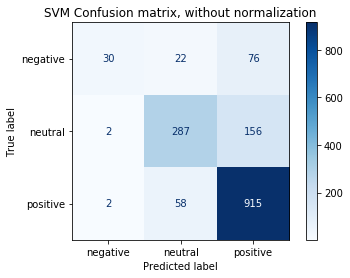

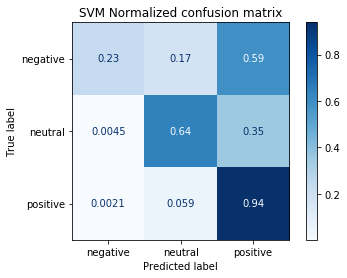

In [25]:
# Plot non-normalized confusion matrix
titles_options = [("SVM Confusion matrix, without normalization", None),
                  ("SVM Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(SVM, Test_X_Tfidf, Test_Y,
                                 display_labels=["negative","neutral","positive"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [26]:
# Classifier - Linear Regression
LR = LogisticRegression().fit(Train_X_Tfidf,Train_Y)
predictions_LR = LR.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_LR, Test_Y)*100)
print("Logistic Regression Precision Score -> ",precision_score(predictions_LR, Test_Y, average="weighted")*100)
print("Logistic Regression Recall Score -> ",recall_score(predictions_LR, Test_Y, average="weighted")*100)
print("Logistic Regression F1 Score -> ",f1_score(predictions_LR, Test_Y, average="weighted")*100)
#print('Logistic Regression ROC AUC Score: -> ',roc_auc_score(predictions_LR, Test_Y, multi_class='ovr')*100)
#print('Confusion Matrix: ',confusion_matrix(Test_Y,predictions_LR), sep = '\n')

Logistic Regression Accuracy Score ->  77.51937984496125
Logistic Regression Precision Score ->  88.05422148131026
Logistic Regression Recall Score ->  77.51937984496125
Logistic Regression F1 Score ->  80.67330385769218


Logistic Regression Confusion matrix, without normalization
[[ 20  19  89]
 [  0 232 213]
 [  1  26 948]]
Logistic Regression Normalized confusion matrix
[[0.15625    0.1484375  0.6953125 ]
 [0.         0.52134831 0.47865169]
 [0.00102564 0.02666667 0.97230769]]


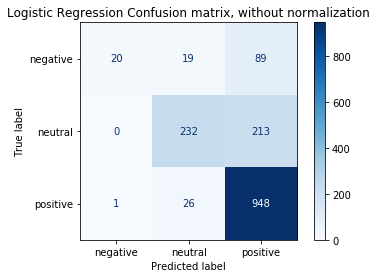

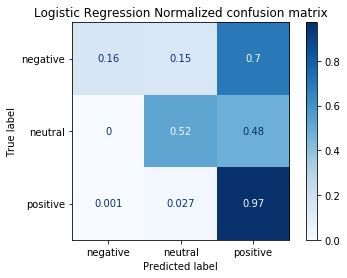

In [27]:
# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(LR, Test_X_Tfidf, Test_Y,
                                 display_labels=["negative","neutral","positive"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [28]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(Train_X_Tfidf,Train_Y)
predictions_KNN = KNN.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("KNN Accuracy Score -> ",accuracy_score(predictions_KNN, Test_Y)*100)
print("KNN Precision Score -> ",precision_score(predictions_KNN, Test_Y, average="weighted")*100)
print("KNN Recall Score -> ",recall_score(predictions_KNN, Test_Y, average="weighted")*100)
print("KNN F1 Score -> ",f1_score(predictions_KNN, Test_Y, average="weighted")*100)
#print('Confusion Matrix: ',confusion_matrix(Test_Y,predictions_KNN), sep = '\n')

KNN Accuracy Score ->  65.82687338501292
KNN Precision Score ->  65.33016702111702
KNN Recall Score ->  65.82687338501292
KNN F1 Score ->  65.55826635977263


KNN Confusion matrix, without normalization
[[ 49  28  51]
 [ 39 239 167]
 [ 54 190 731]]
KNN Normalized confusion matrix
[[0.3828125  0.21875    0.3984375 ]
 [0.08764045 0.53707865 0.3752809 ]
 [0.05538462 0.19487179 0.74974359]]


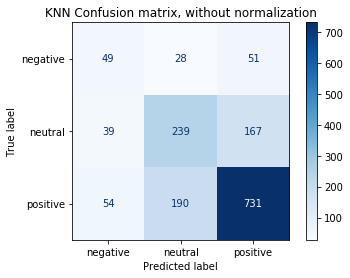

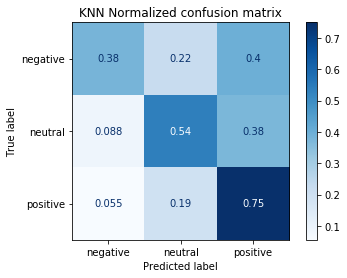

In [29]:
# Plot non-normalized confusion matrix
titles_options = [("KNN Confusion matrix, without normalization", None),
                  ("KNN Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(KNN, Test_X_Tfidf, Test_Y,
                                 display_labels=["negative","neutral","positive"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [30]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Considering 3 grams and mimnimum frq as 0
tf_idf_vect = CountVectorizer(analyzer='word',ngram_range=(1,1),stop_words='english', min_df = 0.0001)
tf_idf_vect.fit(df['clean_tweet'])
desc_matrix = tf_idf_vect.transform(df["clean_tweet"])

In [36]:
# implement kmeans
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

In [37]:
# create DataFrame films from all of the input files.
tweets = {'Tweet': df["clean_tweet"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame

,Tweet,Cluster
2,ready black friday shopping forget pick stock ...,2
0,people real wealth meet remote lab team teamac...,0
2,courserious review new strategy start selling ...,2
0,yes english weird understand tough thorough th...,0
0,great webinar zoom interactive onlinelearning ...,0
...,...,...
0,interesting interview podcast reckless sophier...,0
0,open buy pay later account saidyou approve sou...,0
2,national institute genealogical study offer dn...,2
0,master interdisciplinary study mi program offe...,0


In [38]:
frame['Cluster'].value_counts()

0    3290
2    1692
1     176
Name: Cluster, dtype: int64

Text(0, 0.5, 'tweets')

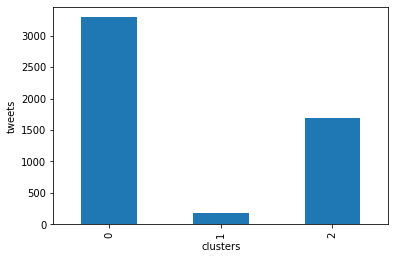

In [48]:
#plot the cluters 
ax = frame['Cluster'].value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('clusters')
ax.set_ylabel('tweets')

In [103]:
frame[frame['Cluster'] == 1]

,Tweet,Cluster
1,people real wealth meet remote lab team teamac...,1
1,yes english weird understand tough thorough th...,1
1,great webinar zoom interactive onlinelearning ...,1
1,final mediation training take place december m...,1
1,join u create readiness amp difficult behaviou...,1
...,...,...
1,look teacher interview work title school succe...,1
1,interesting interview podcast reckless sophier...,1
1,open buy pay later account saidyou approve sou...,1
1,master interdisciplinary study mi program offe...,1


In [104]:
frame[frame['Cluster'] == 2]

,Tweet,Cluster
2,ready black friday shopping forget pick stock ...,2
2,courserious review new strategy start selling ...,2
2,five thing learn five year online learn via ga...,2
2,know speak educator lot find online teach chal...,2
2,big challenge big fear teach kid read remotely...,2
...,...,...
2,http tutorial learn create calendar use html w...,2
2,rethink learn world exponential change q conve...,2
2,thing canvaslms ccsdblended nved nvedchat ccsd...,2
2,onlineeducation low cost improve quality tel e...,2


In [105]:
frame[frame['Cluster'] == 0]

,Tweet,Cluster
0,gov tate reef cap federal education grant mill...,0
0,randstad u udemy launch tech training program ...,0
0,web camera dublin high school classroom connec...,0
0,insight public sector host forum educational t...,0
0,final declaration http continuingeducation dig...,0
...,...,...
0,biden focus high education could help institut...,0
0,association test publisher atp launch first ed...,0
0,side ask education expert covid impact plan ht...,0
0,mvusd name iste distinguish district http cont...,0


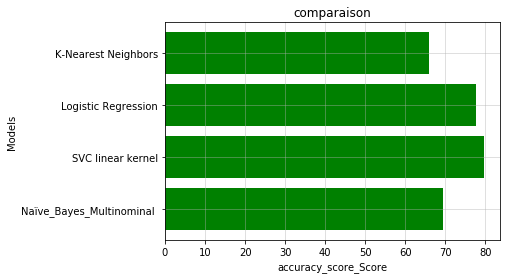

In [52]:
#Comaparaison between the three classifier 
x = ["Naïve_Bayes_Multinominal ","SVC linear kernel","Logistic Regression",'K-Nearest Neighbors']
y = np.array([accuracy_score(predictions_NB, Test_Y)*100,accuracy_score(predictions_SVM, Test_Y)*100,accuracy_score(predictions_LR, Test_Y)*100,accuracy_score(predictions_KNN, Test_Y)*100])
plt.barh(x,y, color='green')
plt.xlabel("accuracy_score_Score")
plt.ylabel("Models")
plt.title("comparaison")
plt.grid(alpha=0.5)
plt.show()